In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('seligdatfile.csv', sep='\s+',header=None)

In [2]:
#numb = np.rot90(df, axes=(1, 1))

In [3]:
x = np.array(df[0])
y = np.array(df[1])

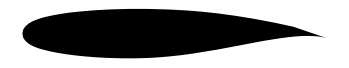

In [4]:
import matplotlib.pyplot as plt
from matplotlib import transforms

#coord = df.values
#create lists of x and y values
plt.figure(figsize=(6, 1))
plt.fill(x,y, "black")
plt.axis('off')

plt.savefig('airfoil.jpg', bbox_inches='tight', pad_inches=1, dpi=100)
#plt.figure()
#plt.plot(xs,ys) 
#plt.show() # if you need...

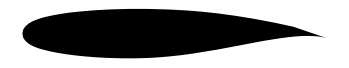

In [5]:
import matplotlib.pyplot as plt
from matplotlib import transforms

coord = df.values
#create lists of x and y values
plt.figure(figsize=(6, 1))
plt.fill(x,y, "black")
plt.axis('off')

plt.savefig('airfoil.png', bbox_inches='tight', pad_inches=1, dpi=100, transparent=True)
#plt.figure()
#plt.plot(xs,ys) 
#plt.show() # if you need...

In [6]:
#cv2.imshow("Rotated (Correct)", edged)

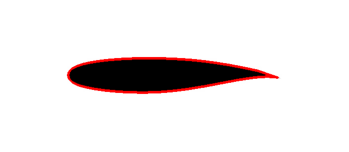

In [7]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

# Reading the image
im = cv2.imread('airfoil.jpg')

# Converting image to grayscale
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Thresholding and getting contours from the image
ret, thresh = cv2.threshold(imgray, 127, 255, 1)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
plt.imshow(im_copy)
plt.axis("off");

In [8]:
def scale_contour(cnt, scale):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    cnt_scaled = cnt_norm * scale
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

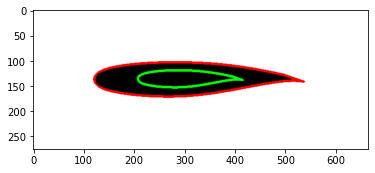

In [56]:
cnt_scaled = scale_contour(contours[0], 0.5)

im_copy = im.copy()
cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
cv2.drawContours(im_copy, [cnt_scaled], 0, (0, 255, 0), 3)

plt.imshow(im_copy)
#plt.axis("off");

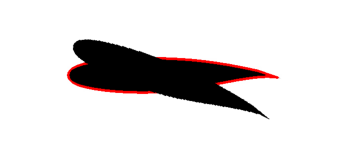

In [53]:
def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho


def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y


def rotate_contour(cnt, angle):
    global M
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    
    coordinates = cnt_norm[:, 0, :]
    xs, ys = coordinates[:, 0], coordinates[:, 1]
    thetas, rhos = cart2pol(xs, ys)

    thetas = np.rad2deg(thetas)
    thetas = (thetas + angle) % 360
    thetas = np.deg2rad(thetas)
    
    xs, ys = pol2cart(thetas, rhos)
    
    cnt_norm[:, 0, 0] = xs
    cnt_norm[:, 0, 1] = ys

    cnt_rotated = cnt_norm + [cx, cy]
    cnt_rotated = cnt_rotated.astype(np.int32)

    return cnt_rotated

cnt_rotated = rotate_contour(contours[0], 20)
im_copy = im.copy()
cnt_scaled = scale_contour(cnt_rotated, 0.3)
cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
cv2.drawContours(im_copy, [cnt_scaled], 0, (0, 0, 0), -1)
cv2.drawContours(im_copy, [cnt_rotated], 0, (0, 0, 0), -1)

plt.imshow(im_copy)
plt.axis("off");

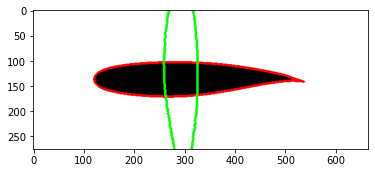

In [11]:
cnt_rotated = rotate_contour(contours[0], 90)
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
cv2.drawContours(im_copy, [cnt_rotated], 0, (0, 255, 0), 3)
plt.imshow(im_copy)
#plt.axis("off");

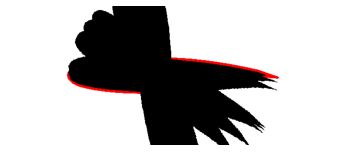

In [47]:
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)

for i in range(20):
    
    cnt_rotated = rotate_contour(contours[0], np.random.random() * 90)
    cnt_scaled = scale_contour(cnt_rotated, np.random.random() * 0.5)
    
    r, g, b = [int(np.random.choice(range(255))) for _ in range(3)]
    cv2.drawContours(im_copy, [cnt_scaled], 0, (0, 0, 0), -1)
    cv2.drawContours(im_copy, [cnt_rotated], 0, (0, 0, 0), -1)

plt.imshow(im_copy)
plt.axis("off");

In [1]:
import numpy as np
import pandas
import glob
import os
import skimage.io
import scipy.io

In [3]:
route= glob.glob(r'./test_data/labels/*.csv')
route_label_list = [os.path.basename(x)[:-4] for x in route]
label = []
for route_label in route_label_list:
    a = pandas.read_csv('./test_data/labels/'+route_label+'.csv',delimiter=',')
    data = a.values
    print(a)